<a href="https://colab.research.google.com/github/1900690/gerbera-pest-object-detection/blob/main/%E7%94%BB%E5%83%8F%E5%90%88%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#動画から画像抽出

In [2]:
import cv2
import os

def save_frame_range(video_path,
                     dir_path, ext='jpg'):

    basename=video_path[-12:-4]
    cap = cv2.VideoCapture(video_path)

    # 総フレーム数
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT));

    #★真ん中+1のフレームを取り出すプラスの数値を調整することでフレームをずらせる
    center_frame=total_frames//2
    start_frame=0
    stop_frame=total_frames
    step_frame=100

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    for n in range(start_frame, stop_frame, step_frame):
        cap.set(cv2.CAP_PROP_POS_FRAMES, n)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
        else:
            return

#スライスフォルダを作成
SAVE_NAME = 'slice'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#動画を入れたフォルダのパスを記載
LOAD_FOLDA = '/content/douga'
LOAD_NAME = os.listdir(LOAD_FOLDA)


for file_name in LOAD_NAME:
  IMAGE_PATH= LOAD_FOLDA +'/'+file_name
  save_frame_range(IMAGE_PATH,
                 '/content/'+SAVE_NAME)

image_date=LOAD_FOLDA[-8:]

#動画合成（新式）
課題：合成結果はどれかの写真が強く出てしまう

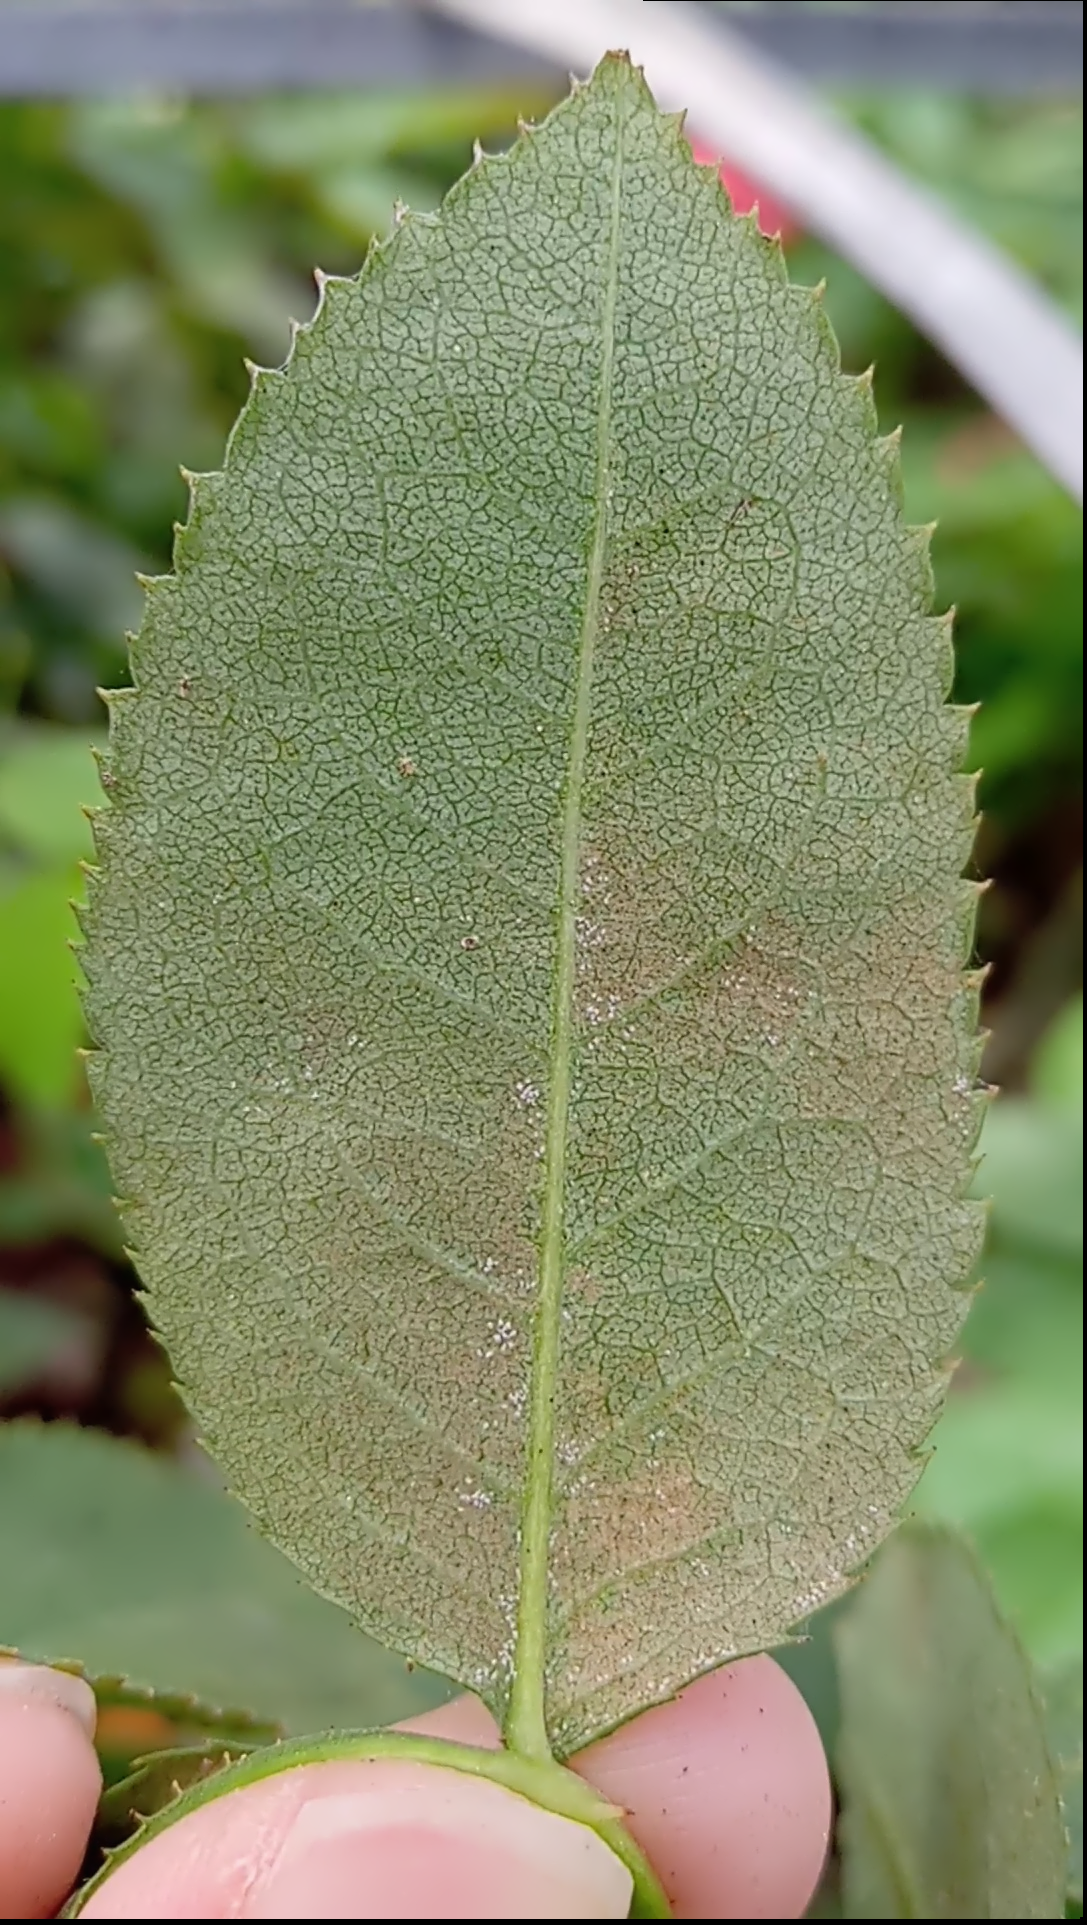

-1

In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow

imgs = []
imgs.append(cv.imread('/content/slice/MOV_0319_100.jpg'))
#imgs.append(cv.imread('/content/slice/MOV_0319_000.jpg'))
imgs.append(cv.imread('/content/slice/MOV_0319_113.jpg'))
# imgs.append(cv.imread('original_image_left.jpg'))
# imgs.append(cv.imread('original_image_right.jpg'))

stitcher = cv.Stitcher_create(mode = 1) # opencv4
#stitcher = cv.createStitcher(True) # opencv3

stitched = stitcher.stitch(imgs)[1]
cv2_imshow(stitched)
cv.waitKey(0)

#動画合成（旧式）

In [8]:
#アルファブレンド
import cv2
import glob
import os
from google.colab.patches import cv2_imshow

#階層移動
os.chdir("/content/slice")
#階層内のPathを全取得
path = glob.glob("*")
print(path)

#一枚目と二枚目を合成
dst=cv2.addWeighted(cv2.imread(path[0]), 1/len(path), cv2.imread(path[1]), 1/len(path), 0)

#残りを合成
for number in list(range(2,len(path))):
  src = cv2.imread(path[number])
  #src = cv2.resize(src, dst.shape[1::-1])#サイズを合わせる必要があるなら
  dst=cv2.addWeighted(dst,1, src, 1/len(path), 0)

#書き出し
cv2.imwrite("/content/result.jpg", dst)
#表示する場合
#cv2_imshow(dst)

['MOV_0319_113.jpg', 'MOV_0319_000.jpg', 'MOV_0319_100.jpg']


True

In [ ]:
#比較明合成
import cv2
import glob

flist = glob.glob("/content/oroginal/*.jpg")    #ソースの写真群がある場所
sums = cv2.imread(flist.pop())
for fname in flist:
    current = cv2.imread(fname)
    #sums = np.maximum(current,sums)   # ここで比較明合成！
    sums = np.minimum(current,sums)   # ここで比較暗合成！
cv2.imwrite("result.jpg", sums)